In [1]:
import sys
sys.path.append(r'C:\Users\mha114\Dropbox\Python\massimal\tools')
# sys.path.append("/tf/massimal/python/massimal/tools")

In [2]:
import json
import pathlib
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import sklearn.decomposition
import sklearn.preprocessing
import hyspec_io, misc, hyspec_stats

In [19]:
# Paths
# hyspec_dir = pathlib.Path(r'D:\Bodo_Juvika\Hyperspectral\20220624\Area\2_R_rs')
hyspec_dir = pathlib.Path(r'/media/mha114/Massimal/Bodo_Juvika/Hyperspectral/20220624/Area/2_R_rs')
pca_model_path = pathlib.Path(r'/media/mha114/Massimal/Bodo_Juvika/Hyperspectral/20220624/Area/M_PcaModelImage_13_20_21_24_25_30_31/pca_model.npz')

In [4]:
# Parameters
training_image_numbers = [13,20,21,24,25,30,31]

In [5]:
hyspec_image_paths = []
for im_num in training_image_numbers:
    hyspec_image_paths.append(list(hyspec_dir.glob('*_'+str(im_num)+'-*.hdr'))[0])

In [6]:
X_list = []
for image_path in hyspec_image_paths:
    print(str(image_path.name))
    image,_,_,_ = hyspec_io.load_envi_image(str(image_path))
    X_list.append(hyspec_stats.random_sample_image(image,frac=0.2))

Juvika_June2022_Pika_L_13-Crop Wavelengths.bip.hdr
Juvika_June2022_Pika_L_20-Crop Wavelengths.bip.hdr
Juvika_June2022_Pika_L_21-Crop Wavelengths.bip.hdr
Juvika_June2022_Pika_L_24-Crop Wavelengths.bip.hdr
Juvika_June2022_Pika_L_25-Crop Wavelengths.bip.hdr
Juvika_June2022_Pika_L_30-Crop Wavelengths.bip.hdr
Juvika_June2022_Pika_L_31-Crop Wavelengths.bip.hdr


In [7]:
X = np.concatenate(X_list)

In [8]:
scaler = sklearn.preprocessing.StandardScaler()
X_norm = scaler.fit_transform(X)

In [9]:
# Create preliminary PCA model
pca = sklearn.decomposition.PCA(n_components=30)
_ = pca.fit(X_norm)

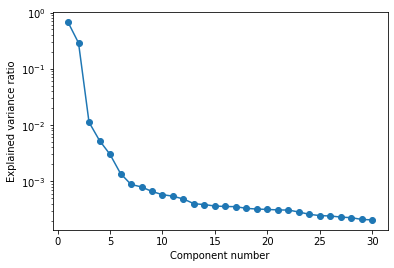

In [10]:
# Plot explained variance ratio
plt.semilogy(np.arange(1,pca.n_components+1),pca.explained_variance_ratio_,'-o')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component number')
plt.show()

In [13]:
print(f'Cumulative explained variance using 6 components: {np.sum(pca.explained_variance_ratio_[0:6])*100} %')

Cumulative explained variance using 6 components: 98.01836337844263 %


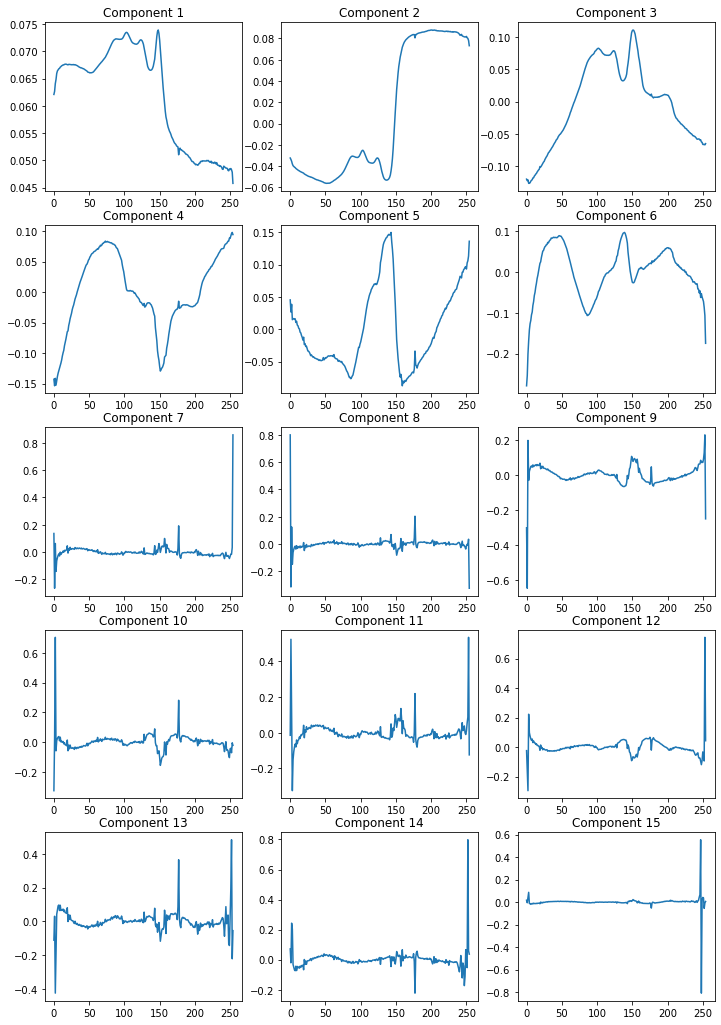

In [15]:
fig, ax = plt.subplots(nrows=5,ncols=3,figsize=(12,18))
for i,component in enumerate(pca.components_[0:15]):
    ax[i//3][i%3].plot(component)
    ax[i//3][i%3].title.set_text(f'Component {i+1}')

In [21]:
# Extract PCA matrix for first components only, and transpose (for later matrix multiplication)
n_comp = 6
pca_components = np.transpose(pca.components_[0:n_comp,:])

In [24]:
# Save to file
np.savez(pca_model_path,
         X_mean = scaler.mean_,
         X_std = scaler.scale_,
         pca_components = pca_components)

In [26]:
data = {}
with np.load(pca_model_path) as npz_files:
    print('Found the following Numpy arrays in the saved file:')
    for variable_name in npz_files.files:
        print(variable_name)
        data[variable_name] = npz_files[variable_name]

Found the following Numpy arrays in the saved file:
X_mean
X_std
pca_components
